In [1]:
#command line interface intput:
#python3 read_file_and_plot.py Simulation_time, simulation_time_unit, time_step(eg:ps/ns/fs), simulation_output_file_path, output_filename(eg:test_out1) 

#to test this module: python read_file_and_plot.py 4, 'ps', 'fs', ./dist-end-to-end.agr, 'test_example1'

#inputs description
sys.argv[0] = Simulation_time,
sys.argv[1] = simulation_time_unit(ps), 
sys.argv[2] = time_step(eg:ps/ns/fs), 
sys.argv[3] = simulation_output_file_path, 
sys.argv[4] = output_filename(eg:density_out1)

In [2]:
import sys
import pandas as pd
import  matplotlib.pyplot as plt
import numpy as np

In [10]:
class read_file_and_plot:
    def __init__(self, tsim, tsim_unit, tstep, file_path, out_filename):
        self.tsim = tsim
        self.tsim_unit = tsim_unit
        self.tstep = tstep
        self.file_path = file_path
        self.out_filename = out_filename
        
    def output(self):
        self.sim_file_to_dataframe()
    
    def sim_file_to_dataframe(self):
        # create the pd dataframe from the given text file
        
        df_file1 = pd.DataFrame(index = None, columns = ['step', 'Param_val']) #create empty df to read the simulation output
        columns = list(df_file1.columns)
        
        special_characters = "!@#$%^&*'(-+?_=,<>/"

        with open(self.file_path) as f:
            for line in f:
                if line[0] not in special_characters:
                    tmp_ls = line.split() #this is the list of num as string
                    tmp_ls = [float(x) for x in tmp_ls]
                    df_file1.loc[len(df_file1)] = tmp_ls #append the list of floats in df
                    
        #get the required time step dataframe
        num_Tstep = df_file1['step'][-1:]
        
        #assuming that time frame for data available was is in ps
        if self.tsim_unit == 'ps':
            
            if self.tstep == 'ns': #going to higher unit doesnot make sense eg: ps -> ns
                df_file1['time_step(ns)'] = df_file1.apply(lambda row: row.step * 0.001, axis = 1)

            if self.tstep == 'ps':
                df_file1['time_step(ps)'] = df_file1.apply(lambda row: row.step * (self.tsim/num_Tstep), axis = 1)

            if self.tstep == 'fs':
                #each step is sub multiple of time for simulation i.e tsim.
                df_file1['time_step(fs)'] = df_file1.apply(lambda row: row.step *1000*(self.tsim/num_Tstep), axis = 1)
                
            df_file1.to_csv('./output/' + self.out_filename + '.csv', sep=',', header=True, index=False)   
        self.plot(df_file1)
    
    def plot(self,df_file1):
        x = df_file1['time_step' + '(' + self.tstep + ')']
        y = df_file1['Param_val']

        fig, ax = plt.subplots(figsize=(20, 10),)
        ax.plot(x, y, color='black', linewidth=1, linestyle='-',label='test') 
        ax.set_xlim(xmin=0)

        ax.set_xlabel('time step' + '(' + self.tstep + ')') # Add an x-label to the axes.
        #derive y_label
        y_label= (self.file_path.rsplit('/')[-1]).rsplit('.')[0]        
        ax.set_ylabel( y_label)  # Add a y-label to the axes.
        
        ax.set_title('add_title')  # Add a title to the axes.
        ax.legend(loc='best')
        
        fig.savefig('./output/' + self.out_filename + '.png')
        plt.show()
        

    

In [4]:
# # to run from the command line
# #this is the last step of code
# test1 = read_file_and_plot(sys.argv[0],sys.argv[1],sys.argv[2],sys.argv[3],sys.argv[4])
# test1.plot()

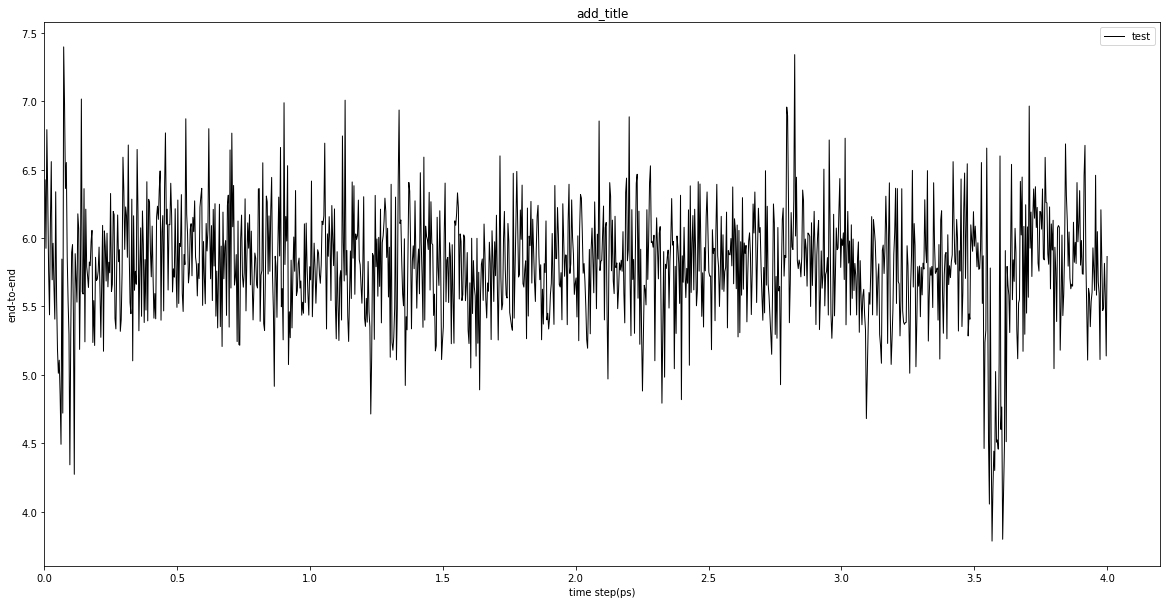

In [12]:
#this is the last step of code
test1 = read_file_and_plot(4,'ps','ps', './data1/end-to-end.dat','test')
test1.output()

In [ ]:
# df_file1

In [ ]:
#junk

In [ ]:
x = './adsfd/dist-end-to-end.agr'
print (x.rsplit('/')[-1])